In [54]:
import numpy as np
import matplotlib.pyplot as plt


days = 100  
obs_per_day = 1
nobs = days * obs_per_day
linspace = 1000
X = np.arange(0, days, 1./(obs_per_day * linspace))
true_lambda = 36.
true_rho = 0.108 
k = 5e-4
true_gamma = np.cos(3.14 * X / 500)
true_delta = 0.1
N = 1000.
c = 3.5

def true_data(true_lambda, true_rho, true_gamma, true_delta, days, obs_per_day, state0=[350., 20., 1200.],N=N, k=k, c=c, linspace=1000, noise=True):
    """
    generate data using pre-set parameters 
    """
    # check input
    # [ S, E, I, D, cfr0]
    nobs = days
    step_size = 1. / (linspace * obs_per_day)
    state_ls = np.ones((days * linspace * obs_per_day, 3))
    state_ls[0] = state0.copy()
    for i in range(1, linspace * days * obs_per_day):
        index = i - 1
        state_ls[i][0] = state_ls[i - 1][0] + step_size * (true_lambda - true_rho * state_ls[i - 1][0] - k * (1-true_gamma[index]) * state_ls[i - 1][0] * state_ls[i - 1][2])
        state_ls[i][1] = state_ls[i - 1][1] + step_size * (k * (1-true_gamma[index]) * state_ls[i - 1][0] * state_ls[i - 1][2] - true_delta * state_ls[i - 1][1])
        state_ls[i][2] = state_ls[i - 1][2] + step_size * (N * true_delta * state_ls[i - 1][1] - c * state_ls[i - 1][2]) 
    states = state_ls[::obs_per_day * linspace]

    return states[:, 0], state_ls[:, 1], np.log(states[:, 2])


Tt, It, true_x = true_data(true_lambda, true_rho, true_gamma, true_delta, days, obs_per_day)




def recover_data(a1, a2, Tt, state0, linspace=1000, days=100, obs_per_day=1):
    """
    params: parameter: [re, pe, pi, pd]
    """
    # check input
    # [ S, E, I, D, cfr0]
    step_size = 1. / linspace
    state_ls = np.ones(days * linspace)
    state_ls[0] = state0
    x_initial = np.linspace(0, 1000, days)
    x_interp = np.linspace(0, 1000, days * linspace)
    a1_interp = np.interp(x_interp, x_initial, a1)
    a2_interp = np.interp(x_interp, x_initial, a2)
    Tt_interp = np.interp(x_interp, x_initial, Tt)
    for i in range(1, linspace * days):
        index = i - 1
        state_ls[i] = state_ls[i - 1] + step_size * (
                    1e5 * a1_interp[index] * np.exp(-state_ls[i - 1]) + 1e3 * a2_interp[index] * Tt_interp[index] * np.exp(
                -state_ls[i - 1]) - 3.5)

    return state_ls[::linspace]


days = 100
obs_per_day = 1
all_a1 = np.zeros((100, days * obs_per_day))
all_a2 = np.zeros((100, days * obs_per_day))
all_a = np.zeros((100, days * obs_per_day))              
all_xinit = np.zeros(100)
for i in range(100):
    file = np.load('G:/RK-HIV/a1-' + str(i) + '.npy')
    all_a1[i] = file
    file = np.load('G:/RK-HIV/a2-'+str(i) + '.npy')
    all_a2[i] = file
    all_a[i] = 1e5 * all_a1[i] + 1e3 * all_a2[i] * Tt

for i in range(100):
    file = np.load('G:/RK-HIV/xinit-'+ str(i) + '.npy')
    all_xinit[i] = file
    
Tt = np.load('G:/HIV observations.npy')[0][:, 1]

all_reconstructed_x = np.zeros((100, 100))
for i in range(100):
    print(i)
    all_reconstructed_x[i] = recover_data(all_a1[i], all_a2[i], Tt, all_xinit[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


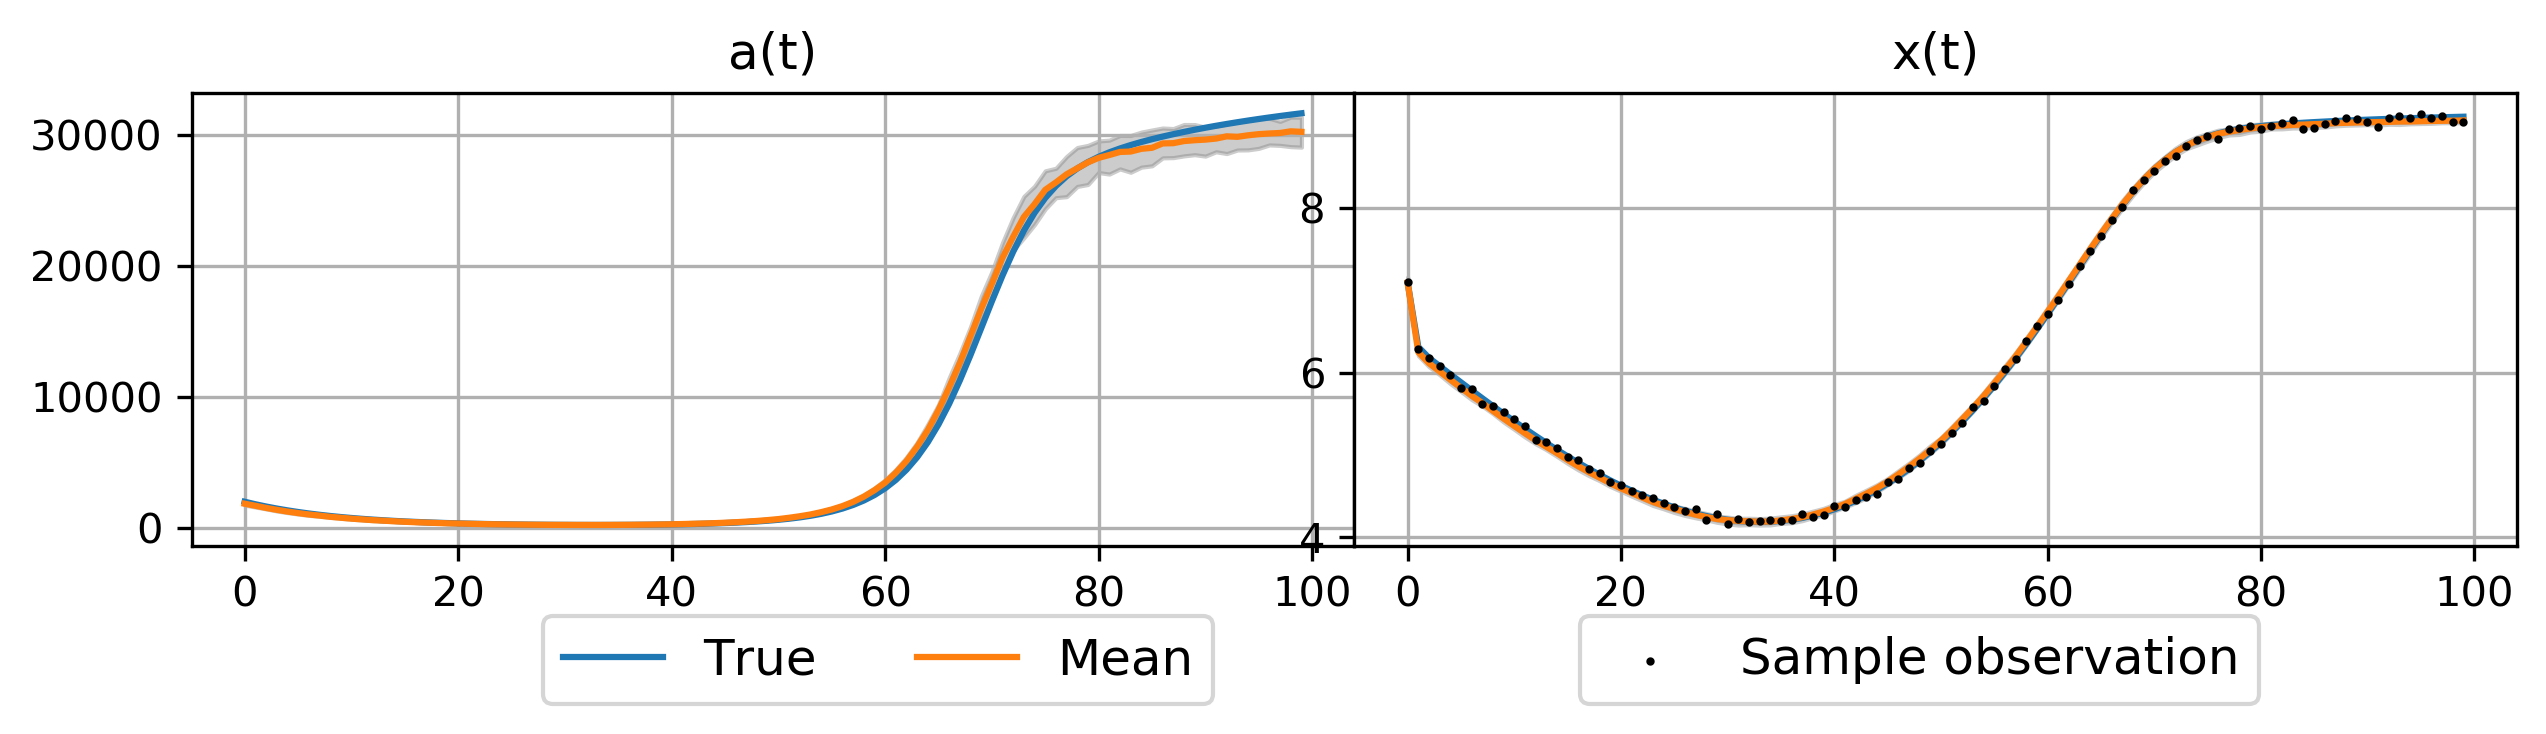

In [61]:
days = 100  
obs_per_day = 1
nobs = days * obs_per_day
X = np.arange(0, days, 1./obs_per_day)
true_lambda = np.repeat(36, nobs)
true_rho = np.repeat(0.108, nobs) 
k = 5e-4
true_gamma = np.cos(3.14 * X / 500)
true_delta = np.repeat(0.1, nobs) 
N = 1000.
c = 3.5

It_diff = np.zeros(100)
for i in range(100):
    It_diff[i] = (It[1000 * i + 1] - It[1000 * i]) * 1000
    
true_a = -N * It_diff + Tt * (N * k * (1-true_gamma) * np.exp(true_x))


%matplotlib inline
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize
#figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

figsize(10, 2)
plt.subplots_adjust(wspace =0, hspace =0)
ax1 = plt.subplot(1, 2, 1)
lower_95 = np.percentile(all_a, 97.5, axis=0)
upper_95 = np.percentile(all_a, 2.5, axis=0)
x = np.arange(0, days, 1 / obs_per_day)
plt.fill_between(x, lower_95, upper_95, color='grey', alpha = 0.4)
plt.plot(np.arange(0, days, 1 / obs_per_day), true_a, label='True')
plt.plot(x, np.mean(all_a, axis=0), label='Mean')
plt.grid()
plt.title('a(t)')
plt.legend(bbox_to_anchor=(0.9, -0.1), fontsize=12, ncol=4)


ax1 = plt.subplot(1, 2, 2)
yobs = np.load('G:/HIV observations.npy')[1]
lower_95 = np.percentile(all_reconstructed_x, 97.5, axis=0)
upper_95 = np.percentile(all_reconstructed_x, 2.5, axis=0)
x = np.arange(0, days, 1 / obs_per_day)
plt.fill_between(x, lower_95, upper_95, color='grey', alpha = 0.4)
plt.plot(np.arange(0, days, 1 / obs_per_day), true_x)
plt.plot(x, np.mean(all_reconstructed_x, axis=0))
plt.scatter(np.arange(0, days, 1 / obs_per_day), yobs[:, 0], s = 1, color='black', label='Sample observation', zorder=100)
plt.grid()
plt.title('x(t)')
plt.legend(bbox_to_anchor=(0.8, -0.1), fontsize=12, ncol=4)

# Calculate RMSE

In [62]:
a_RMSE = np.zeros(100)
x_RMSE = np.zeros(100)
for i in range(100):
    x_RMSE[i] = np.sqrt(np.mean(np.square(true_x - all_reconstructed_x[i])))
    a_RMSE[i] = np.sqrt(np.mean(np.square(true_a - all_a[i])))

print(np.mean(a_RMSE), np.std(a_RMSE))    
print(np.mean(x_RMSE), np.std(x_RMSE))

695.7126657357906 50.92634516538593
0.037922012598832 0.0026750859616166294
